In [1]:
import json
from pathlib import Path
from PIL import Image

print(f'Current path: {Path.cwd()}')

dataset_root = Path.cwd().parent / 'bigdat'
print(f'dataset root: {dataset_root}')

def get_page_descriptor(doc_number, page_number) -> Path:
    return dataset_root / str(doc_number) / 'pages' / f'page-{page_number}.json'

def get_page_image(doc_number, page_number) -> Path:
    return dataset_root / str(doc_number) / 'pages' / f'page-{page_number}.png'

Current path: /root/objectdet-check/formdet
dataset root: /root/objectdet-check/bigdat


In [3]:
doc_number = 67331
page_number = 3
descriptor_file = get_page_descriptor(doc_number, page_number)
if descriptor_file.exists():
    with descriptor_file.open(mode='r') as json_fid:
        data = json.load(json_fid)
else:         
    data = dict()
    data['fields'] = []
    
if data 
data['fields'][0]

{'id': '1',
 'bbox': {'x': 93.0, 'y': 267.0, 'width': 370.0, 'height': 23.0},
 'type': 'text',
 'label': 'Name',
 'fontFamily': 'Arial',
 'fontSize': 12.0}

In [4]:
type_to_color = {
    'unknown': 'black',
    'text':'lime',
    'number': 'mediumblue',
    'date':'magenta',
    'cells':'yellow',
    'image':'orangered',
    'dropdown':'orangered',
    'checkmark_X':'gold',
    'checkmark_V':'red',
    'checkmark_O':'slategray',
    'radio':'dodgerblue',
    'signature':'darkviolet',
}


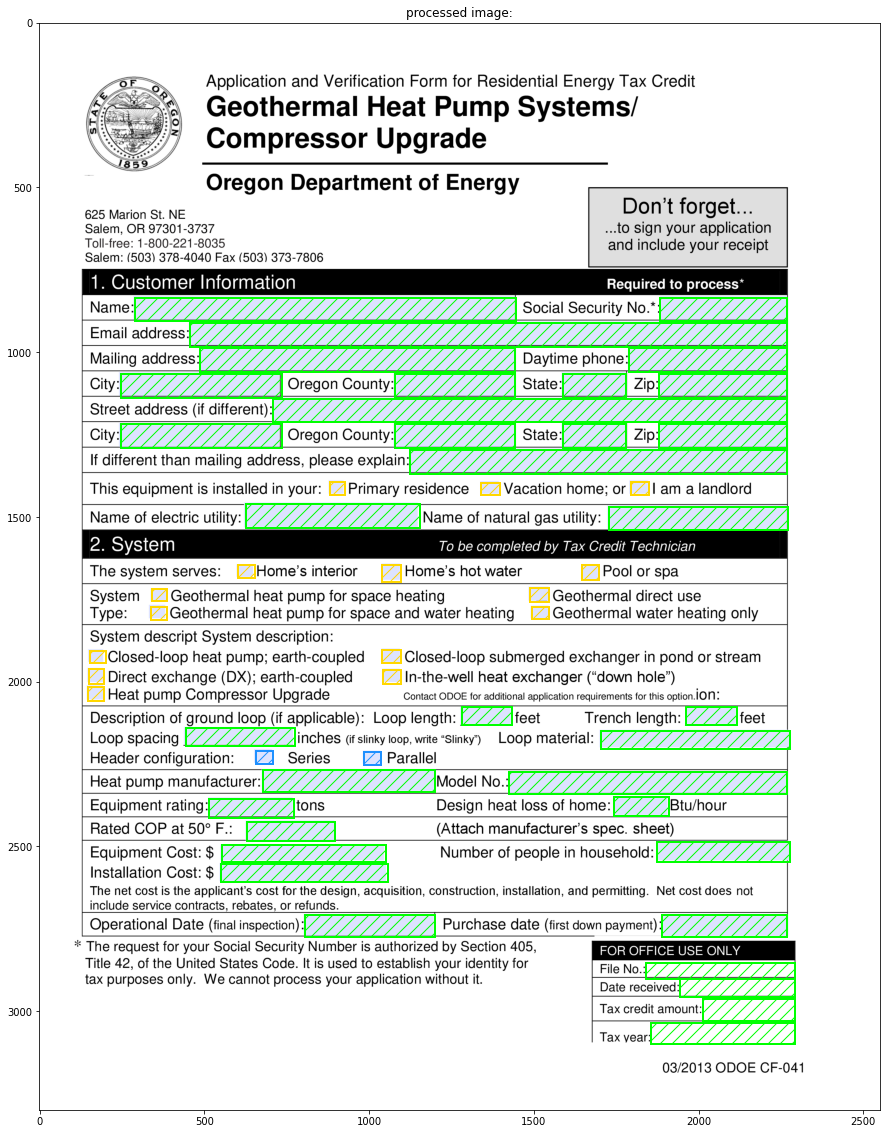

In [5]:
from matplotlib.patches import Circle, Rectangle
import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow, subplots
from matplotlib.colors import to_hex

image = Image.open(get_page_image(doc_number, page_number))

fig, ax = subplots(figsize=(20, 20))
ax.set_title('processed image:')
# imp = ax.imshow(image, interpolation='lanczos')
imp = ax.imshow(image)
ax.axis('on')

cc = 300./96.
for field in data['fields']:
#     print(f"bbox: {field['bbox']} type: {field['type']}")
    bbox = field['bbox']
    x = bbox['x'] * cc
    y = bbox['y'] * cc
    w = bbox['width'] * cc
    h = bbox['height'] * cc
    ax.add_patch(Rectangle((x, y), w, h, fill=False, color=type_to_color[field['type']], linewidth=2, hatch='//'))